<a href="https://colab.research.google.com/github/angelaaaateng/ML_COVID_PREDICTION/blob/master/Exploration_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries + Load Data

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# amber additions
!pwd

/Users/angelateng/NYU_GoogleDrive/GitHub/ML_COVID_PREDICTION


### DSP Data (Key = PHCaseNo)

In [21]:
data = pd.read_csv('openrefine_PH_CASES.csv')
data.head()

,Case No.,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Residence Lat,Residence Long,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.598727,120.9819909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PH00002,M,44,Chinese,None,Yes (China); Husband of PH1,China,NaN,NaN,NaN,...,14.598727,120.9819909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PH00003,F,60,Chinese,None,Yes (China),China,NaN,NaN,NaN,...,14.598727,120.9819909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PH00004,M,48,Filipino,Taguig City,Yes (Japan),Japan,NaN,NaN,NaN,...,14.517274,121.0496133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PH00005,M,62,Filipino,"Cainta, Rizal",Husband of PH06,None,NaN,NaN,NaN,...,14.586506,121.1138255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.columns

Index(['Case No.', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History 1', 'Travel History 2',
       'Travel History 3', 'Travel History 4', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       'Date of Lab Confirmation', 'Date of Announcement to the Public',
       'Admission / Consultation', 'Symptoms', 'Symptoms 1', 'Symptoms 2',
       'Symptoms 3', 'Other disease', 'Other disease 1', 'Other disease 2',
       'Other disease 3', 'Other disease 4', 'Other disease 5', 'Status',
       'Health Status', 'Date of Final Status (recovered/expired)',
       'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2',
       'Latitude', 'Longitude', 'Residence Lat', 'Residence Long', 'Column',
       'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7',
       'Column8'],
      dtype='object')

In [29]:
data = data.rename(columns={'Case No.': 'phcaseno'})

In [47]:
data = data.rename(columns={'Location 1': 'case_location'})

In [48]:
data.dtypes

phcaseno                                     object
Sex                                          object
Age                                           int64
Nationality                                  object
Residence in the Philippines                 object
History of Travel / Exposure                 object
Travel History 1                             object
Travel History 2                             object
Travel History 3                             object
Travel History 4                             object
Epi_Link                                     object
Date of Onset of Symptoms                    object
Date of Admission                            object
Date of Lab Confirmation                     object
Date of Announcement to the Public           object
Admission / Consultation                     object
Symptoms                                     object
Symptoms 1                                   object
Symptoms 2                                   object
Symptoms 3  

In [31]:
data.shape

(3246, 46)

### Department of Health Data (Key = CaseCode)

In [32]:
doh = pd.read_csv('opnrefine_DOH_data.csv')
doh.head()

,CaseCode,Age,AgeGroup,Sex,DateRepConf,DateRecover,DateDied,RemovalType,DateRepRem,Admitted,...,Residence Lat,Residence Long,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,C100119,30,30 to 34,Male,Sun Apr 12 00:00:00 EDT 2020,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C100264,57,55 to 59,Male,Sun Mar 29 00:00:00 EDT 2020,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C100660,42,40 to 44,Female,Thu Apr 02 00:00:00 EDT 2020,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C100776,42,40 to 44,Male,Wed Apr 01 00:00:00 EDT 2020,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C101015,79,75 to 79,Male,Fri Apr 03 00:00:00 EDT 2020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
doh.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateRepConf', 'DateRecover',
       'DateDied', 'RemovalType', 'DateRepRem', 'Admitted', 'RegionRes',
       'ProvCityRes', 'Location', 'case_location', 'Location 2', 'Latitude',
       'Longitude', 'Case No.', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       'Date of Lab Confirmation', 'Date of Announcement to the Public',
       'Admission / Consultation', 'Symptoms', 'Other disease', 'Status',
       'Health Status', 'Date of Final Status (recovered/expired)',
       'Final Diagnosis', 'Age Group', 'Residence Lat', 'Residence Long',
       'Column', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8'],
      dtype='object')

In [61]:
doh = doh.rename(columns={'Location 1': 'case_location'})

In [62]:
doh.shape

(8469, 45)

## Diagnosis Descriptions and Variables 

In [25]:
data.groupby('Health Status').size()

Health Status
Asymptomatic        38
Critical             3
Died               108
For validation    2983
Mild                57
Recovered           51
Severe               6
dtype: int64

In [39]:
doh.groupby('Health Status').size()

Health Status
Asymptomatic        38
Critical             3
Died               108
For validation    2983
Mild                57
Recovered           51
Severe               6
dtype: int64

## Feature Engineering: Location

In [67]:
location_df = doh[['case_location', 'RegionRes',
 'ProvCityRes',
 'Location',
 'Location 2',
 'Latitude',
 'Longitude']]

In [68]:
location_df

,case_location,RegionRes,ProvCityRes,Location,Location 2,Latitude,Longitude
0,Parañaque City,Metro Manila,City of Parañaque,"Parañaque City, Metro Manila",Metro Manila,14.479310,121.019200
1,Mandaluyong City,Metro Manila,City of Mandaluyong,Mandaluyong City,NaN,14.579530,121.035000
2,Pasig City,Metro Manila,City of Pasig,"Pasig City, Metro Manila",Metro Manila,14.576160,121.084600
3,Pila,Laguna,Pila,"Pila, Laguna",Laguna,14.234500,121.365000
4,Unisan,Quezon,Unisan,"Unisan, Quezon",Quezon,13.860430,122.014200
...,...,...,...,...,...,...,...
8464,For validation,NaN,NaN,For validation,NaN,14.615867,120.980991
8465,For validation,NaN,NaN,For validation,NaN,14.615867,120.980991
8466,For validation,NaN,NaN,For validation,NaN,14.615867,120.980991
8467,For validation,NaN,NaN,For validation,NaN,14.615867,120.980991


In [69]:
master = pd.merge(data, location_df, how='left', on= 'case_location')

In [70]:
master.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Column5,Column6,Column7,Column8,RegionRes,ProvCityRes,Location_y,Location 2_y,Latitude_y,Longitude_y
0,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
1,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
2,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
3,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
4,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982


In [71]:
master_cols = master.columns.tolist()
master_cols 

['phcaseno',
 'Sex',
 'Age',
 'Nationality',
 'Residence in the Philippines',
 'History of Travel / Exposure',
 'Travel History 1',
 'Travel History 2',
 'Travel History 3',
 'Travel History 4',
 'Epi_Link',
 'Date of Onset of Symptoms',
 'Date of Admission',
 'Date of Lab Confirmation',
 'Date of Announcement to the Public',
 'Admission / Consultation',
 'Symptoms',
 'Symptoms 1',
 'Symptoms 2',
 'Symptoms 3',
 'Other disease',
 'Other disease 1',
 'Other disease 2',
 'Other disease 3',
 'Other disease 4',
 'Other disease 5',
 'Status',
 'Health Status',
 'Date of Final Status (recovered/expired)',
 'Final Diagnosis',
 'Age Group',
 'Location_x',
 'case_location',
 'Location 2_x',
 'Latitude_x',
 'Longitude_x',
 'Residence Lat',
 'Residence Long',
 'Column',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',
 'RegionRes',
 'ProvCityRes',
 'Location_y',
 'Location 2_y',
 'Latitude_y',
 'Longitude_y']

In [72]:
col_drop_list = ['Column',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',]

In [73]:
master = master.drop(col_drop_list, axis = 1) 
master.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Latitude_x,Longitude_x,Residence Lat,Residence Long,RegionRes,ProvCityRes,Location_y,Location 2_y,Latitude_y,Longitude_y
0,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.61348,120.98095,14.598727,120.9819909,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
1,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.61348,120.98095,14.598727,120.9819909,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
2,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.61348,120.98095,14.598727,120.9819909,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
3,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.61348,120.98095,14.598727,120.9819909,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982
4,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.61348,120.98095,14.598727,120.9819909,Metro Manila,City of Manila,"Manila City, Metro Manila",Metro Manila,14.59873,120.982


In [75]:
master['case_location']

0             Manila City
1             Manila City
2             Manila City
3             Manila City
4             Manila City
                ...      
2112834    For validation
2112835    For validation
2112836    For validation
2112837    For validation
2112838    For validation
Name: case_location, Length: 2112839, dtype: object

In [80]:
master.shape

(2112839, 44)

In [79]:
data.shape

(3246, 46)

In [83]:
master = data.merge(location_df, on='case_location', how='inner', indicator=True)

In [84]:
master.shape

(2112833, 53)

In [ ]:
# not working, so we'll try geo encoding instead

In [85]:
data.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Residence Lat,Residence Long,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,14.598727,120.9819909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PH00002,M,44,Chinese,None,Yes (China); Husband of PH1,China,NaN,NaN,NaN,...,14.598727,120.9819909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PH00003,F,60,Chinese,None,Yes (China),China,NaN,NaN,NaN,...,14.598727,120.9819909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PH00004,M,48,Filipino,Taguig City,Yes (Japan),Japan,NaN,NaN,NaN,...,14.517274,121.0496133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PH00005,M,62,Filipino,"Cainta, Rizal",Husband of PH06,None,NaN,NaN,NaN,...,14.586506,121.1138255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data_clean = data.drop(col_drop_list, axis = 1) 
data_clean.head()

,phcaseno,Sex,Age,Nationality,Residence in the Philippines,History of Travel / Exposure,Travel History 1,Travel History 2,Travel History 3,Travel History 4,...,Date of Final Status (recovered/expired),Final Diagnosis,Age Group,Location,case_location,Location 2,Latitude,Longitude,Residence Lat,Residence Long
0,PH00001,F,38,Chinese,None,Yes (China); Wife of PH02,China,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,31 - 40,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
1,PH00002,M,44,Chinese,None,Yes (China); Husband of PH1,China,NaN,NaN,NaN,...,Sat Feb 01 00:00:00 EST 2020,Severe Pneumonia,41 - 50,Manila City,Manila City,NaN,14.613480,120.980950,14.598727,120.9819909
2,PH00003,F,60,Chinese,None,Yes (China),China,NaN,NaN,NaN,...,Sun Mar 15 00:00:00 EDT 2020,NaN,51 - 60,Manila City,Manila City,NaN,14.615867,120.980991,14.598727,120.9819909
3,PH00004,M,48,Filipino,Taguig City,Yes (Japan),Japan,NaN,NaN,NaN,...,Thu Mar 19 00:00:00 EDT 2020,"Asymptomatic, Negative Test Result",41 - 50,Taguig City,Taguig City,NaN,14.606904,121.020392,14.517274,121.0496133
4,PH00005,M,62,Filipino,"Cainta, Rizal",Husband of PH06,None,NaN,NaN,NaN,...,Thu Mar 12 00:00:00 EDT 2020,"Acute Respiratory Distress Syndrome, Severe pn...",61 - 70,"Cainta, Rizal",Cainta,Rizal,14.409635,121.037425,14.586506,121.1138255


In [111]:
# ! pip install geopy
# conda install -c conda-forge geopy 
# ! pip install --user ipykernel
# ! python -m ipykernel install --user --name=venv

# Install a conda package in the current Jupyter kernel
# import sys
# !conda install --yes --prefix {sys.prefix} reverse_geocoder

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install reverse_geocoder

  Using cached https://files.pythonhosted.org/packages/0b/0f/b7d5d4b36553731f11983e19e1813a1059ad0732c5162c01b3220c927d31/reverse_geocoder-1.5.1.tar.gz
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-cp37-none-any.whl size=2268090 sha256=54898746e5081c328232821ec7f72356aaf42fc1cf00454097541cb424fc49b9
  Stored in directory: /Users/angelateng/Library/Caches/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


In [112]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install geopy

  Using cached https://files.pythonhosted.org/packages/53/fc/3d1b47e8e82ea12c25203929efb1b964918a77067a874b2c7631e2ec35ec/geopy-1.21.0-py2.py3-none-any.whl


In [113]:
import geopy

from geopy.geocoders import Nominatim

In [115]:
geolocator = Nominatim(user_agent="covid_19")

In [119]:
location = geolocator.reverse("14.59872, 120.9819909")

In [120]:
location

Location(SM Quiapo, Carlos Palanca Sr., Quiapo, Manila, Quiapo, Third District, Metro Manila, 1001, Philippines, (14.59869615, 120.98191084667977, 0.0))

In [130]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly_express

In [131]:
import plotly_express as px

In [134]:

# px.scatter_mapbox(data_clean, lat='Latitude', lon='Longitude', zoom=1000)

In [147]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install geopandas

     |████████████████████████████████| 931kB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 8.2MB/s eta 0:00:01
     |████████████████████████████████| 11.0MB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 13.9MB 7.0MB/s eta 0:00:01


In [148]:
# %load_ext au totime
import pandas as pd

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

In [149]:
data_clean['geom'] = data_clean['Latitude'].map(str) + ',' + data_clean['Longitude'].map(str)

In [150]:
# create a service provider locator this time pass timeout to be 10 minutes 
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [151]:
rgeocode

In [ ]:
tqdm.pandas()
data_clean['patient_address'] = data_clean['geom'].progress_apply(rgeocode)

/Users/angelateng/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version

 15%|█▌        | 489/3246 [03:48<18:30,  2.48it/s]

In [ ]:
data_clean.head()

In [ ]:
df[['V','allele']] = df['V'].str.split('-',expand=True)

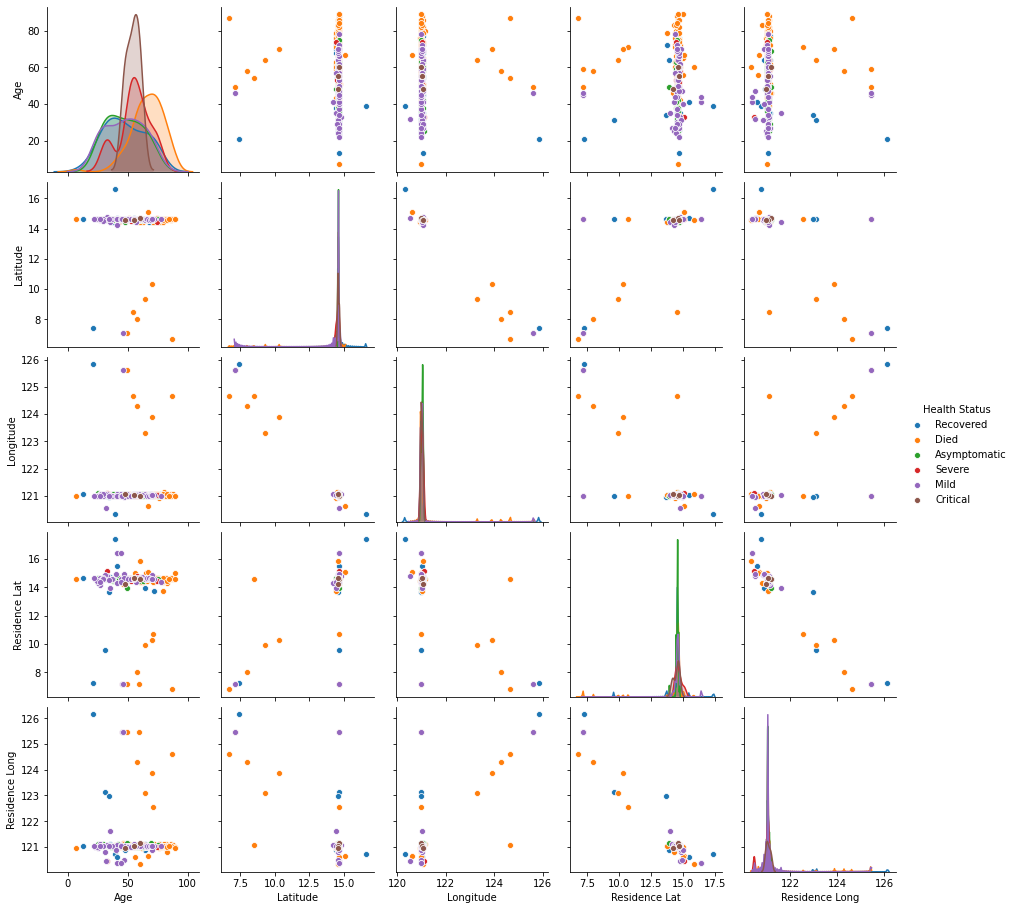

In [0]:
# explore data
sns.pairplot(data_clean[data_clean['Health Status'] != "For validation"], hue="Health Status")

# PCA?

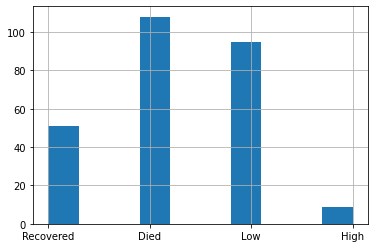

In [0]:
# recode to fewer categories 

# recovered 
# mild + asymptomatic
# severe + critical
# died

# recovered, asymptomatic, mild, severe, critical, died

def health_status(series):
    if series == "Mild" or series == 'Asymptomatic':
        return "Low"
    elif series == "Severe" or series == 'Critical':
        return "High"
    else:
        return series

def health_status3(series):
    if series == "Mild" or series == 'Asymptomatic' or series == "Severe" or series == 'Critical':
        return "Sick"
    else:
        return series

data_clean['Health Status 2'] = data_clean['Health Status'].apply(health_status)
data_clean['Health Status 3'] = data_clean['Health Status'].apply(health_status3)

data_clean['Health Status 2'].hist()

# should we remove recovered?
# make ordinal classes?
# look up ordinal classes

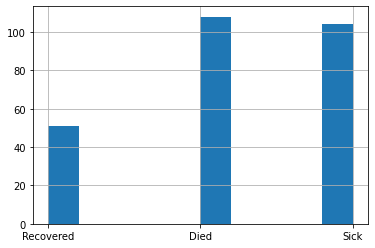

In [0]:
data_clean['Health Status 3'].hist()

In [0]:
# feature transformations

# Case No. : for example - PH00001
data_clean['Case No.'] = data_clean['Case No.'].str[2:]
data_clean['Case No.'] = data_clean['Case No.'].astype(int)
# can we use this?

# Sex -  M/F:
data_clean['Sex'] = pd.get_dummies(data_clean['Sex'])

In [0]:
# Nationality 
data_clean['Nationality'].value_counts() 
# Filipino and Other due to low quantities 
# how should we treat For validation?

def nationality_recode(series):
    if series != 'Filipino':
        return 'Other'
    else: 
      return 'Filipino'

data_clean['Nationality 2'] = data_clean['Nationality'].apply(nationality_recode)
data_clean['Nationality 2'] = pd.get_dummies(data_clean['Nationality 2'])
data_clean['Nationality 2'].value_counts() 

1    240
0     23
Name: Nationality 2, dtype: int64

In [0]:
data_clean['Residence in the Philippines'].value_counts()
# @Amber - can you help recode this, please?
# urban, rural .. regional?

Quezon City                         59
San Juan City                       25
Manila City                         20
Pasig City                          17
Makati City                         17
Parañaque City                      13
Mandaluyong City                    13
Cainta, Rizal                        9
Muntinlupa City                      9
Taguig City                          7
Marikina City                        6
Caloocan City                        6
Davao City, Davao Del Sur            5
For validation                       4
Taytay, Rizal                        3
None                                 3
Antipolo City, Rizal                 3
Batangas City, Batangas              2
Las Piñas City                       2
San Ildefonso, Bulacan               2
Caba, La Union                       2
San Jose Del Monte City, Bulacan     2
Pasay City                           2
Pantukan, Compostela Valley          1
Cabuyao City, Laguna                 1
Porac, Pampanga          

In [0]:
data_clean['Travel History'].value_counts()

def th_recode(series):
    if series != 'None':
        return 'Travel'
    else: 
      return 'No Travel'

data_clean['Travel History 2'] = data_clean['Travel History'].apply(th_recode)
data_clean['Travel History 2'] = pd.get_dummies(data_clean['Travel History 2'])
data_clean['Travel History 2'].value_counts() 

1    148
0    115
Name: Travel History 2, dtype: int64

In [0]:
# can be mined and linked

data_clean['Epi_Link 2'] = data_clean['Epi_Link'].isna()
data_clean['Epi_Link 2'] = pd.get_dummies(data_clean['Epi_Link 2'])
data_clean['Epi_Link 2'].value_counts() 

0    198
1     65
Name: Epi_Link 2, dtype: int64

In [0]:
# can be mined and improved

data_clean['Other disease 2'] = data_clean['Other disease'].isna()
data_clean['Other disease 2'] = pd.get_dummies(data_clean['Other disease 2'])
data_clean['Other disease 2'].value_counts() 

0    149
1    114
Name: Other disease 2, dtype: int64

In [0]:
data_clean['Symptoms'].value_counts()

Asymptomatic                         3
Cough                                3
Fever                                2
Fever, cough                         2
Fever, Cough                         2
Cough, Body malaise                  1
Cough, Comorbidity                   1
Cough, Sore throat, Headache         1
Fever, Sore Throat                   1
Fever, Cough, Shortness of breath    1
Sore throat                          1
Dyspnea                              1
Cough, Colds, Dysphagia              1
Fever, Headache, Body malaise        1
Cough, Sore throat, Colds            1
Cough, Colds                         1
Cough, Difficulty in breathing       1
Fever, Cough, Dizziness              1
Difficulty of breathing              1
Fever, Cough, Sore throat            1
Name: Symptoms, dtype: int64

In [0]:
data_clean.dtypes
# Residence in Phil - maybe @Amber can code?
# History of Travel / Exposure  - needs to be cleaned
# Dates - need to figure out what to do with dates 
# Symptoms - needs to be cleaned

Case No.                                      int64
Sex                                           uint8
Age                                         float64
Nationality                                  object
Residence in the Philippines                 object
History of Travel / Exposure                 object
Travel History                               object
Epi_Link                                     object
Date of Onset of Symptoms                    object
Date of Admission                            object
Date of Lab Confirmation                     object
Date of Announcement to the Public           object
Admission / Consultation                     object
Symptoms                                     object
Other disease                                object
Status                                       object
Health Status                                object
Date of Final Status (recovered/expired)     object
Final Diagnosis                              object
Age Group   

In [0]:
# come back and do feature transformations
#data = data_clean.filter(['Age', 'Longitude', 'Latitude', 'Health Status'])
#data = data_clean.filter(['Case No.', 'Age', 'Sex', 'Nationality 2', 'Travel History 2', 'Epi_Link 2', 'Other disease 2', 'Longitude', 'Latitude', 'Health Status 2'])
data = data_clean.filter(['Case No.', 'Age', 'Sex', 'Nationality 2', 'Travel History 2', 'Epi_Link 2', 'Longitude', 'Latitude', 'Health Status 3'])

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(data.drop('Health Status 2', axis=1), data['Health Status 2'], test_size=0.20, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Health Status 3', axis=1), data['Health Status 3'], test_size=0.20, random_state=0)
# to do: sampling, split review

In [0]:
# standardize the data
from sklearn import preprocessing

standardize = preprocessing.StandardScaler()
X_train = standardize.fit_transform(X_train)
X_test = standardize.fit_transform(X_test) 

Modeling:

In [0]:
# NAIVE BAYES:

# https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7169811320754716


In [0]:
#Accuracy: 0.24528301886792453 - ['Age', 'Longitude', 'Latitude', 'Health Status']
#Accuracy: 0.4528301886792453 - ['Case No.', 'Age', 'Sex', 'Longitude', 'Latitude', 'Health Status']
#Accuracy: 0.6415094339622641 - new labels (low, high)
#Accuracy: 0.6226415094339622 - adds nationality 2
#Accuracy: 0.660377358490566 - adds travel history 2 --> could make this more granular
#Accuracy: 0.6415094339622641 - adds epi link --> could make this more granular
#Accuracy: 0.39622641509433965 - adds other disease --> what is going on here?
#Accuracy: 0.7169811320754716 - without other disease and new labels (sick)

# What metric should we use? 
# Need to create something to see what is happening behind the scenes after we have results - i.e. error checking

In [0]:
# DECISION TREE:
#https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)

In [0]:
cm

array([[16,  2,  2],
       [ 3,  3,  2],
       [ 3,  3, 19]])

In [0]:
print("Accuracy:", metrics.accuracy_score(y_test, dtree_predictions))
dtree_model.score(X_test,  y_test)

Accuracy: 0.7169811320754716


0.7169811320754716

In [0]:
y_pred

array(['Died', 'Died', 'Died', 'Recovered', 'Sick', 'Recovered', 'Sick',
       'Died', 'Sick', 'Sick', 'Died', 'Sick', 'Died', 'Sick', 'Died',
       'Recovered', 'Sick', 'Sick', 'Sick', 'Died', 'Died', 'Sick',
       'Died', 'Sick', 'Sick', 'Sick', 'Sick', 'Sick', 'Died', 'Sick',
       'Died', 'Sick', 'Recovered', 'Sick', 'Sick', 'Died', 'Died',
       'Sick', 'Sick', 'Died', 'Sick', 'Sick', 'Sick', 'Sick', 'Died',
       'Sick', 'Sick', 'Sick', 'Sick', 'Sick', 'Sick', 'Sick', 'Died'],
      dtype='<U9')

In [0]:
dtree_predictions

array(['Sick', 'Died', 'Died', 'Recovered', 'Sick', 'Died', 'Sick',
       'Died', 'Sick', 'Died', 'Died', 'Died', 'Died', 'Recovered',
       'Died', 'Sick', 'Sick', 'Sick', 'Sick', 'Died', 'Died', 'Sick',
       'Died', 'Recovered', 'Sick', 'Died', 'Sick', 'Sick', 'Died',
       'Sick', 'Died', 'Sick', 'Died', 'Sick', 'Recovered', 'Died',
       'Died', 'Sick', 'Recovered', 'Died', 'Sick', 'Sick', 'Recovered',
       'Recovered', 'Died', 'Sick', 'Recovered', 'Sick', 'Died', 'Sick',
       'Sick', 'Sick', 'Died'], dtype=object)

In [0]:
import numpy as np
np.array(y_test)

array(['Recovered', 'Died', 'Died', 'Died', 'Sick', 'Recovered', 'Sick',
       'Died', 'Sick', 'Sick', 'Died', 'Recovered', 'Died', 'Sick',
       'Died', 'Sick', 'Sick', 'Sick', 'Sick', 'Recovered', 'Died',
       'Recovered', 'Died', 'Sick', 'Died', 'Died', 'Sick', 'Sick',
       'Died', 'Sick', 'Died', 'Sick', 'Died', 'Sick', 'Recovered',
       'Died', 'Died', 'Died', 'Sick', 'Died', 'Sick', 'Sick', 'Died',
       'Recovered', 'Died', 'Sick', 'Recovered', 'Sick', 'Sick', 'Sick',
       'Sick', 'Sick', 'Sick'], dtype=object)

In [0]:
# SVM: 

# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
cm

array([[17,  0,  3],
       [ 1,  0,  7],
       [ 1,  0, 24]])

In [0]:
print(accuracy)

0.7735849056603774


In [0]:
# KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) # optimize k
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)

0.7358490566037735


In [0]:
# https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
# https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

# downgrade TensorFlow 1.14
!pip install tensorflow==1.14

In [0]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# Neural network
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 27        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_train2 = y_train.astype('category').cat.codes

from keras.utils import to_categorical
y_train2 = to_categorical(y_train2)

y_test = y_test.astype('category').cat.codes
y_test = to_categorical(y_test)

In [0]:
history = model.fit(X_train, y_train2, epochs=100, batch_size=64)

Epoch 1/100
210/210 [==============================] - 0s 1ms/step - loss: 1.2154 - acc: 0.2952
Epoch 2/100
210/210 [==============================] - 0s 56us/step - loss: 1.1996 - acc: 0.3143
Epoch 3/100
210/210 [==============================] - 0s 43us/step - loss: 1.1845 - acc: 0.3333
Epoch 4/100
210/210 [==============================] - 0s 53us/step - loss: 1.1690 - acc: 0.3429
Epoch 5/100
210/210 [==============================] - 0s 66us/step - loss: 1.1552 - acc: 0.3381
Epoch 6/100
210/210 [==============================] - 0s 42us/step - loss: 1.1424 - acc: 0.3429
Epoch 7/100
210/210 [==============================] - 0s 38us/step - loss: 1.1293 - acc: 0.3476
Epoch 8/100
210/210 [==============================] - 0s 40us/step - loss: 1.1149 - acc: 0.3524
Epoch 9/100
210/210 [==============================] - 0s 34us/step - loss: 1.1033 - acc: 0.3667
Epoch 10/100
210/210 [==============================] - 0s 41us/step - loss: 1.0921 - acc: 0.3905
Epoch 11/100
210/210 [========

In [0]:
y_pred = model.predict(X_test)

In [0]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [0]:
metrics.accuracy_score(pred,test)

0.7169811320754716

In [1]:
# amber github tester